# Previsão de preço de automóveis

Nesse notebook, iremos prever o preço de automóveis de acordo com algumas características.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.get_option('display.max_columns')

pd.set_option("display.max_rows", 150)
pd.get_option("display.max_rows")

import sys
import warnings

warnings.filterwarnings('ignore')

sns.set()
plt.style.use('fivethirtyeight')

In [5]:
data = pd.read_csv('car.csv')

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Análise de Dados

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
data.isna().mean()

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

## Análise Univariada

Aqui vamos apenas analisar a distribuição dos preços dos carros.

<AxesSubplot:title={'center':'Preço'}, xlabel='price'>

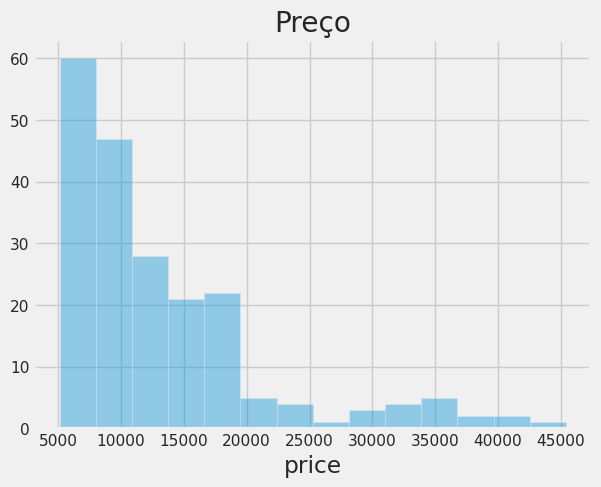

In [15]:
plt.title('Preço')
sns.distplot(data['price'],kde=False)

## Análise Multivariada

### Variáveis Numéricas

In [5]:
df.corr()['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

Vemos que enginesize, curbweight, horsepower, carwidth, carlength, wheelbase, boreratio, citympg e highwaympg tem um alto índice de correlação linear com o preço do automóvel.

## Variáveis Nominais

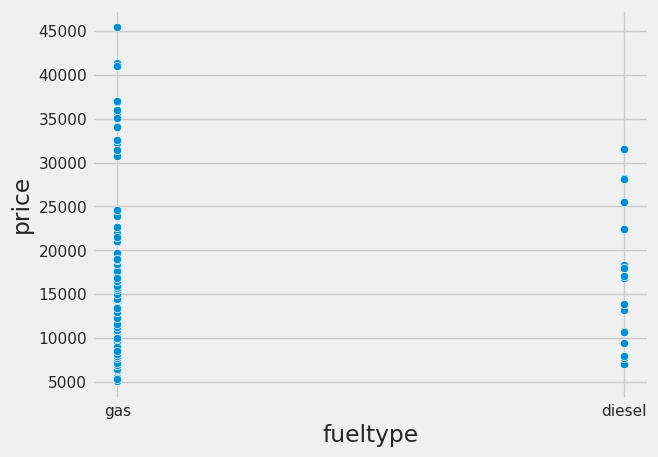

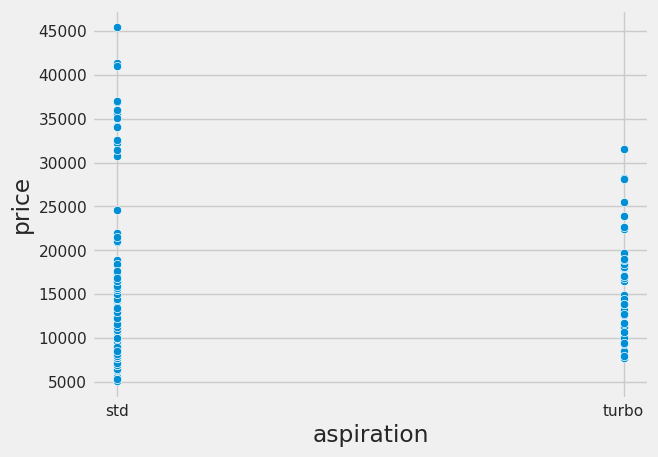

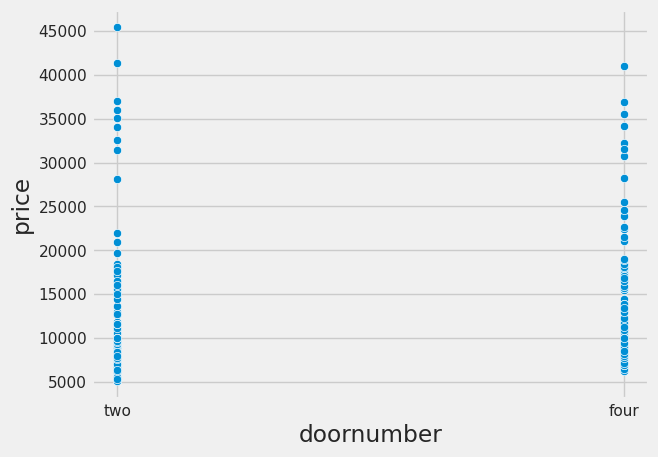

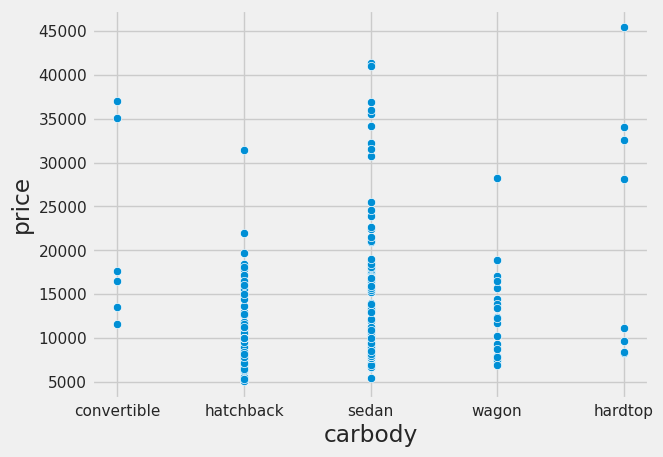

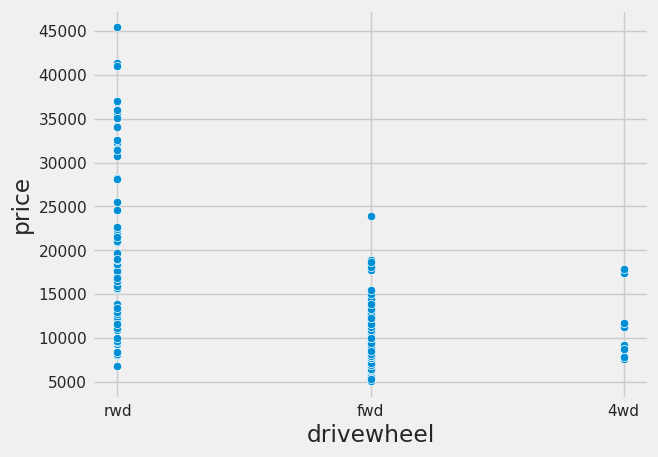

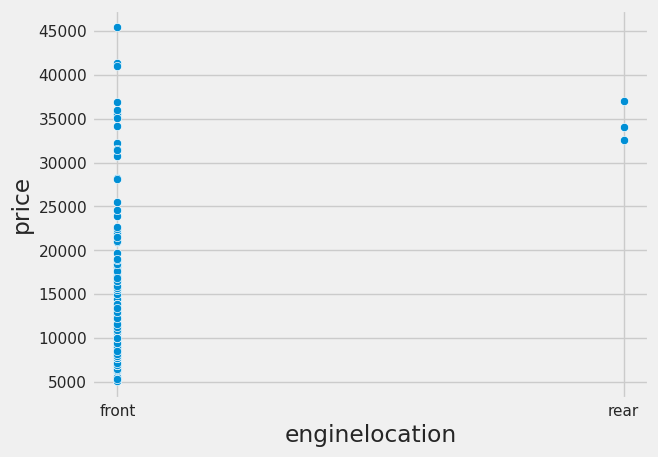

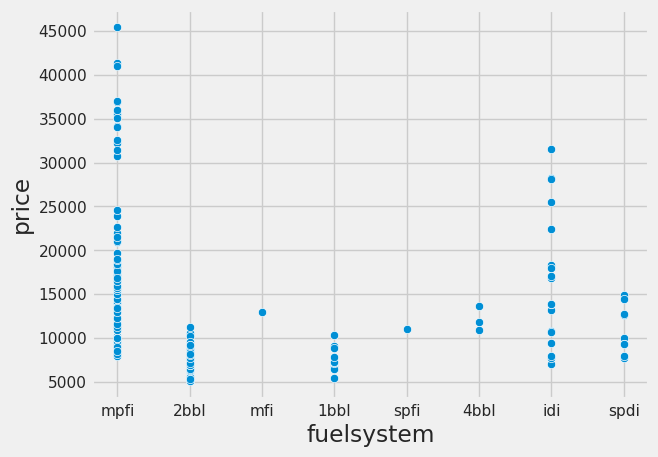

In [11]:
#Selecionando as colunas nominais:

nom_col = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']

#Criando código para plotar scatterplot de todas as nominais em relação ao preço:

n=0 #Contador para número da figura

for i in nom_col:
    plt.figure(num=n)
    sns.scatterplot(x=i, y='price', data=data)
    n+=1

Vamos utilizar todas as variáveis numéricas que tiveram correlação maior que 0.5 e todas as nominais.

In [21]:
X = data[['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'wheelbase', 'boreratio', 'citympg', 
       'highwaympg', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']]

y=data['price']

In [50]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #Separando os dados de treino

In [51]:
#Identificando as colunas numéricas e categóricas:
sel_nom = []
sel_ord = []
sel_num = []

for i in X.columns:
    if data[i].dtypes == 'object':
        if (X[i].nunique()) > 3:
            sel_ord.append(i)

        else:
            sel_nom.append(i)

    else:
        sel_num.append(i)
        print(i)

enginesize
curbweight
horsepower
carwidth
carlength
wheelbase
boreratio
citympg
highwaympg


In [52]:
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


#Pipeline de transformação das variáveis nominais:
transform_nom = Pipeline([
                            
    ('encoder', OneHotEncoder(drop = 'first', sparse=False))
                                
    ])

#Pipeline de transformação das variáveis ordinais:
transform_ord = Pipeline([
                            
    ('encoder', TargetEncoder())
                                    
    ])

#Pipeline das variáveis numéricas:
transform_num = Pipeline([

    ('scaler', StandardScaler())

])


#Criando a pipeline de transformação:
transform = ColumnTransformer([
    ('nom', transform_nom, sel_nom), ('ord', transform_ord, sel_ord), ('num', transform_num, sel_num)
])

## Testando Modelos

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=101)

kfold = KFold(n_splits=4)

#Criando a pipeline do modelo:
pipeline = Pipeline([

    ('transform', transform), ('model', rf)
    
])

#Rodando a Validação Cruzada e calculando o RMSE:
print(np.mean(cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')))

-2298.236903343621


In [54]:
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)

from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test, pred)))

3144.6730654049193
